In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
data=pd.read_csv('House Price Prediction Dataset.csv')

In [4]:
data.head()

,Id,Area,Bedrooms,Bathrooms,Floors,YearBuilt,Location,Condition,Garage,Price
0,1,1360,5,4,3,1970,Downtown,Excellent,No,149919
1,2,4272,5,4,3,1958,Downtown,Excellent,No,424998
2,3,3592,2,2,3,1938,Downtown,Good,No,266746
3,4,966,4,2,2,1902,Suburban,Fair,Yes,244020
4,5,4926,1,4,2,1975,Downtown,Fair,Yes,636056


In [5]:
missing_value=data.isnull().sum()
missing_value

,0
Id,0
Area,0
Bedrooms,0
Bathrooms,0
Floors,0
YearBuilt,0
Location,0
Condition,0
Garage,0
Price,0


In [6]:
duplicate_values=data.duplicated().sum()
duplicate_values

0

In [7]:
data.shape

(2000, 10)

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Id         2000 non-null   int64 
 1   Area       2000 non-null   int64 
 2   Bedrooms   2000 non-null   int64 
 3   Bathrooms  2000 non-null   int64 
 4   Floors     2000 non-null   int64 
 5   YearBuilt  2000 non-null   int64 
 6   Location   2000 non-null   object
 7   Condition  2000 non-null   object
 8   Garage     2000 non-null   object
 9   Price      2000 non-null   int64 
dtypes: int64(7), object(3)
memory usage: 156.4+ KB


## Descriptive Statistics

In [9]:
data.describe()

,Id,Area,Bedrooms,Bathrooms,Floors,YearBuilt,Price
count,2000.000000,2000.000000,2000.000000,2000.00000,2000.000000,2000.000000,2000.000000
mean,1000.500000,2786.209500,3.003500,2.55250,1.993500,1961.446000,537676.855000
std,577.494589,1295.146799,1.424606,1.10899,0.809188,35.926695,276428.845719
min,1.000000,501.000000,1.000000,1.00000,1.000000,1900.000000,50005.000000
25%,500.750000,1653.000000,2.000000,2.00000,1.000000,1930.000000,300098.000000
50%,1000.500000,2833.000000,3.000000,3.00000,2.000000,1961.000000,539254.000000
75%,1500.250000,3887.500000,4.000000,4.00000,3.000000,1993.000000,780086.000000
max,2000.000000,4999.000000,5.000000,4.00000,3.000000,2023.000000,999656.000000


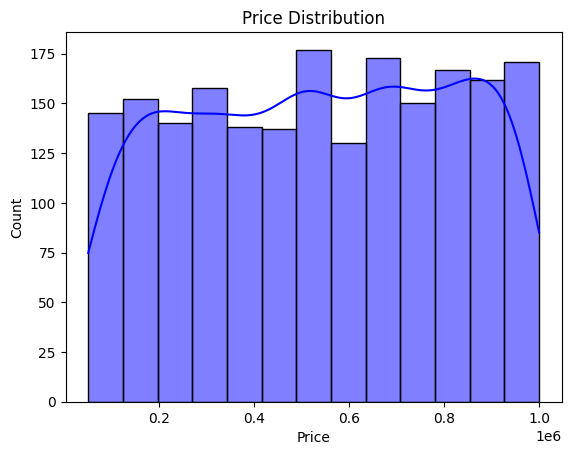

In [13]:
sns.histplot(data['Price'], kde=True, color='blue')
plt.title("Price Distribution")
plt.show()

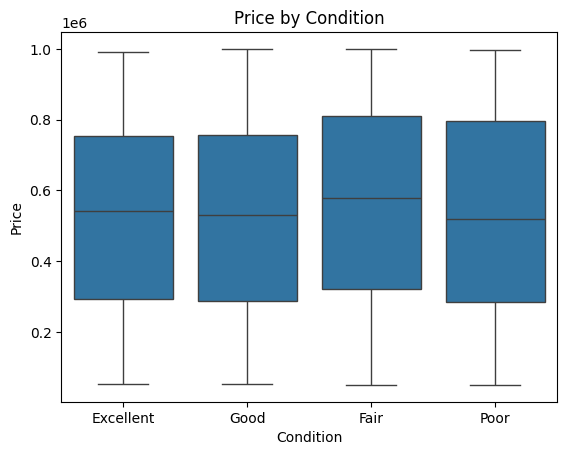

In [14]:
sns.boxplot(x='Condition', y='Price', data=data)
plt.title("Price by Condition")
plt.show()


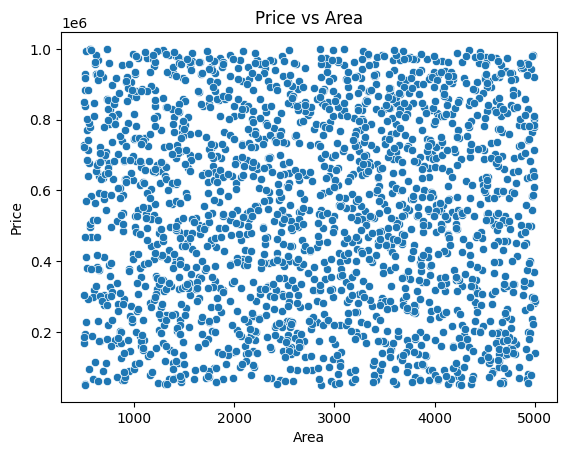

In [15]:
sns.scatterplot(x='Area', y='Price', data=data)
plt.title("Price vs Area")
plt.show()

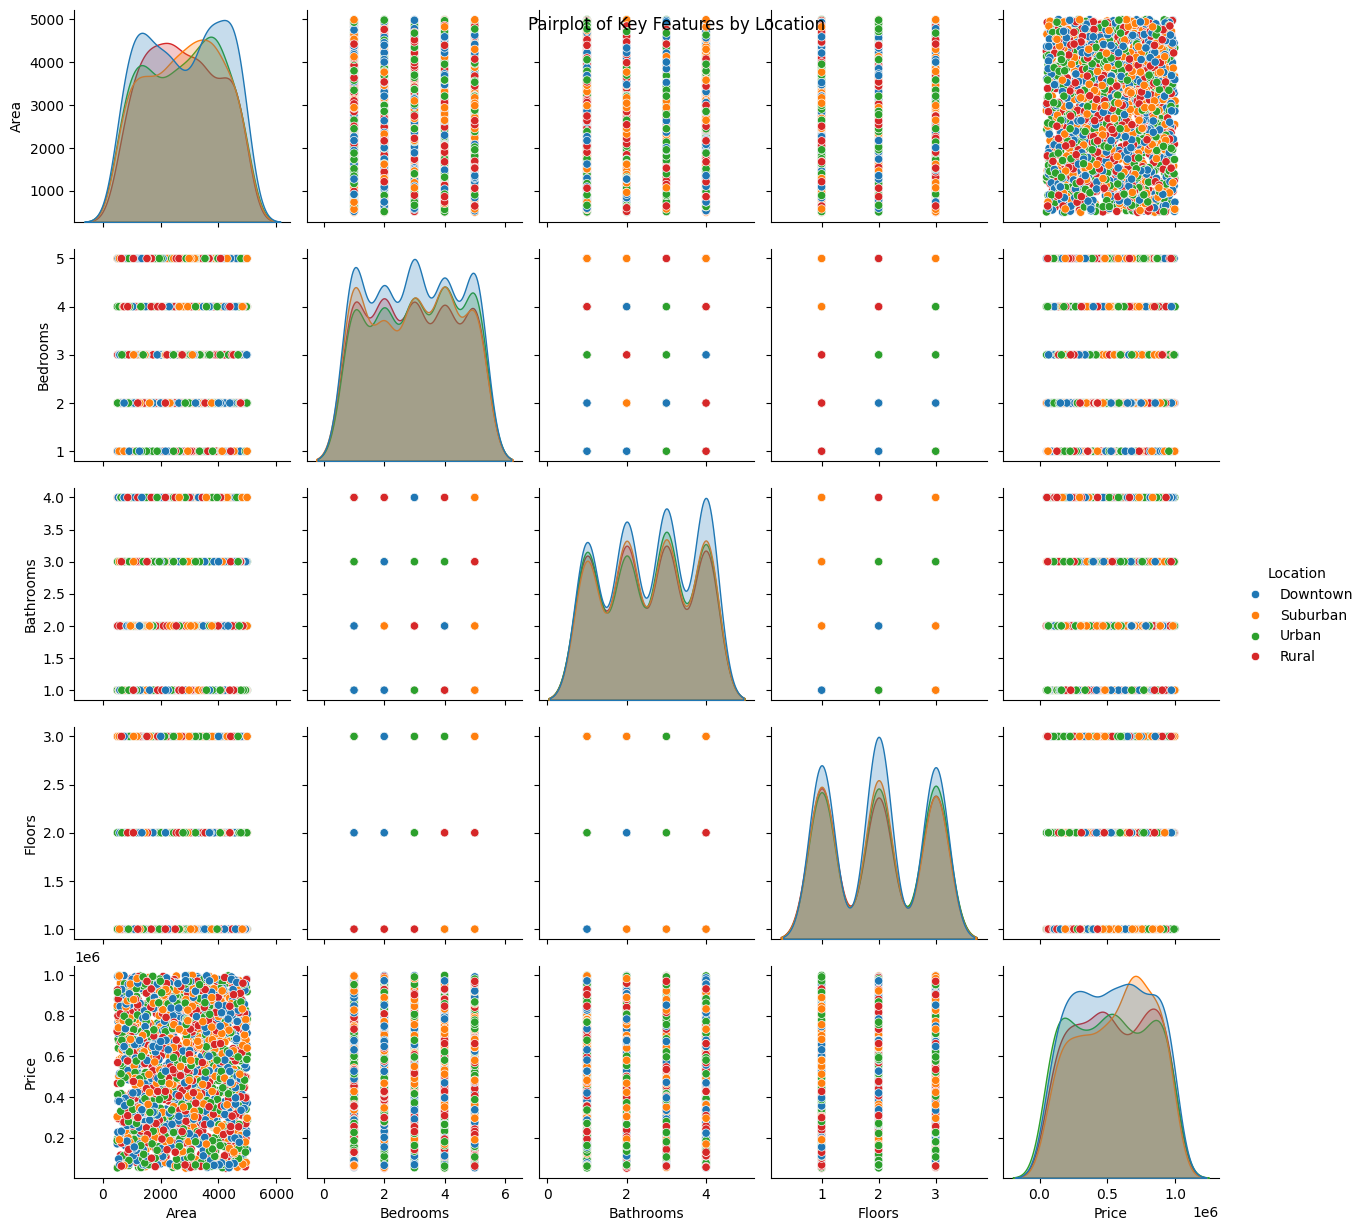

In [16]:
sns.pairplot(data[['Area', 'Bedrooms', 'Bathrooms', 'Floors', 'Price', 'Location']], hue='Location')
plt.suptitle('Pairplot of Key Features by Location')
plt.show()

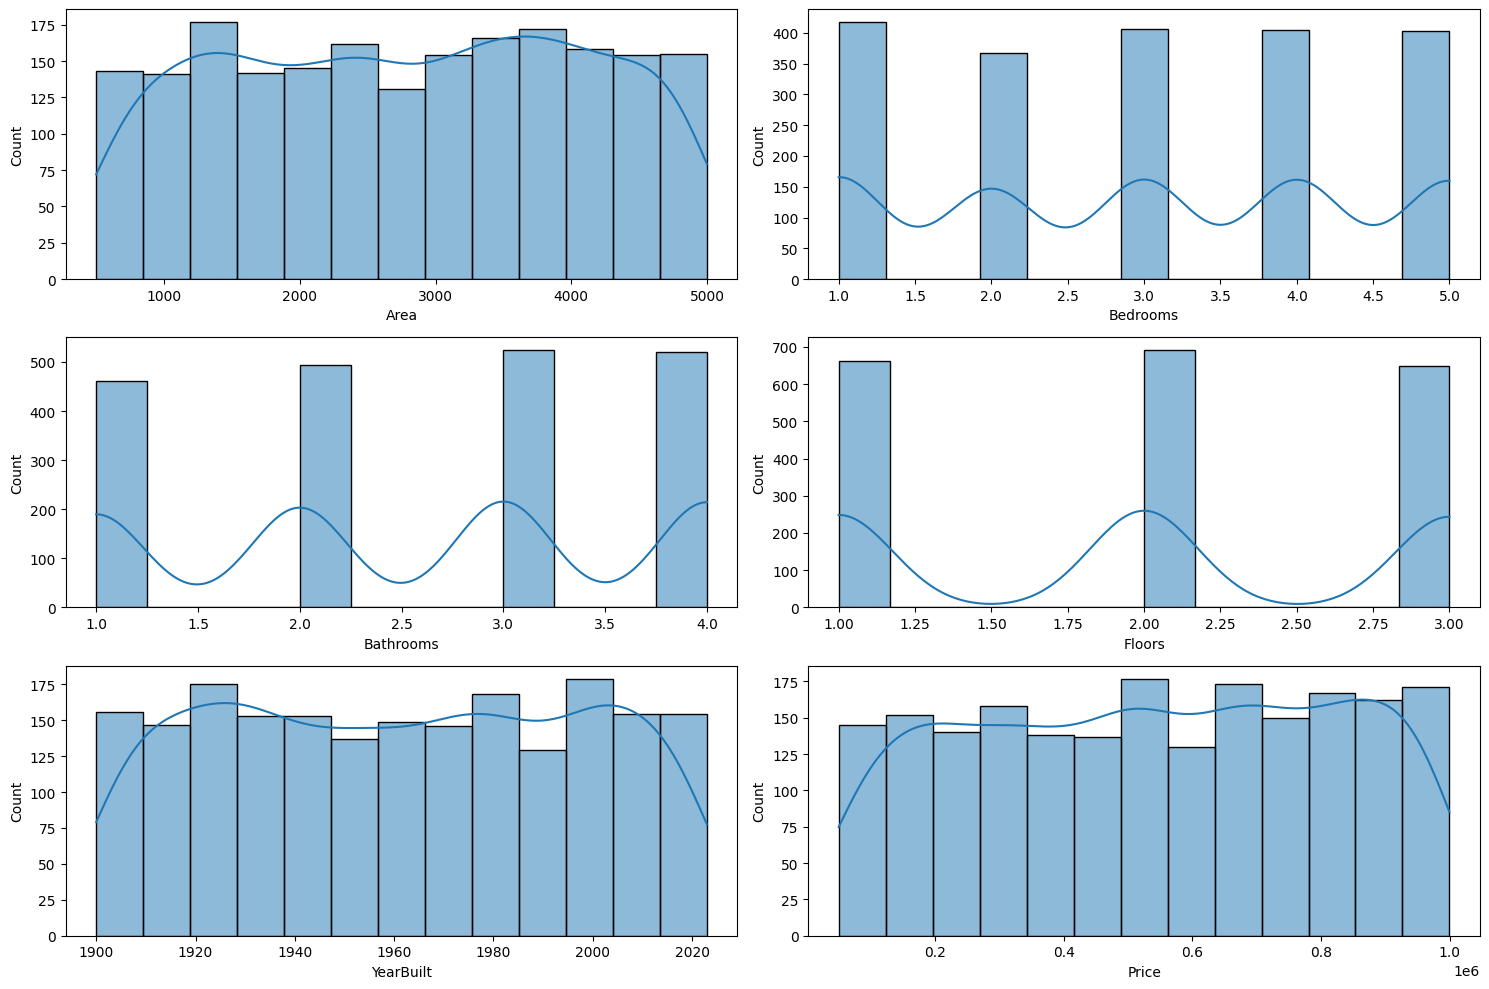

In [17]:
fig, axes = plt.subplots(3, 2, figsize=(15, 10))
sns.histplot(data['Area'], kde = True, ax = axes[0, 0])
sns.histplot(data['Bedrooms'], kde = True, ax = axes[0, 1])
sns.histplot(data['Bathrooms'], kde = True, ax = axes[1, 0])
sns.histplot(data['Floors'], kde = True, ax = axes[1, 1])
sns.histplot(data['YearBuilt'], kde = True, ax = axes[2, 0])
sns.histplot(data['Price'], kde = True, ax = axes[2, 1])
plt.tight_layout()
plt.show()

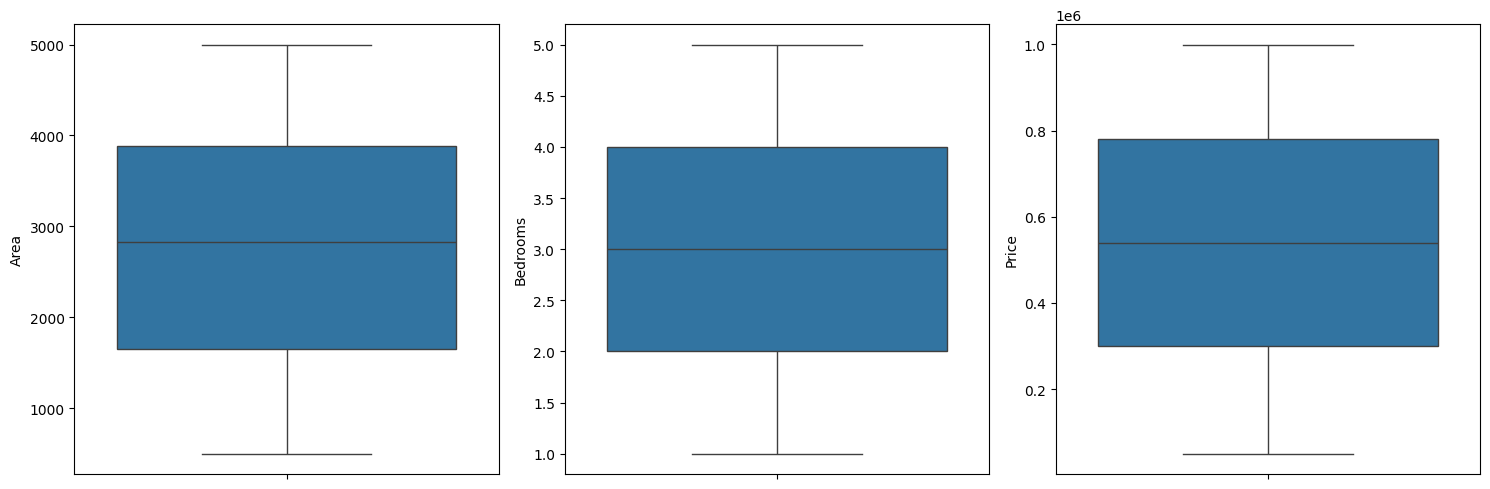

In [18]:
#detect outliers
fig, axes = plt.subplots(1, 3, figsize = (15, 5))
sns.boxplot(y = data['Area'], ax = axes[0])
sns.boxplot(y = data['Bedrooms'], ax = axes[1])
sns.boxplot(y = data['Price'], ax = axes[2])
plt.tight_layout()
plt.show()

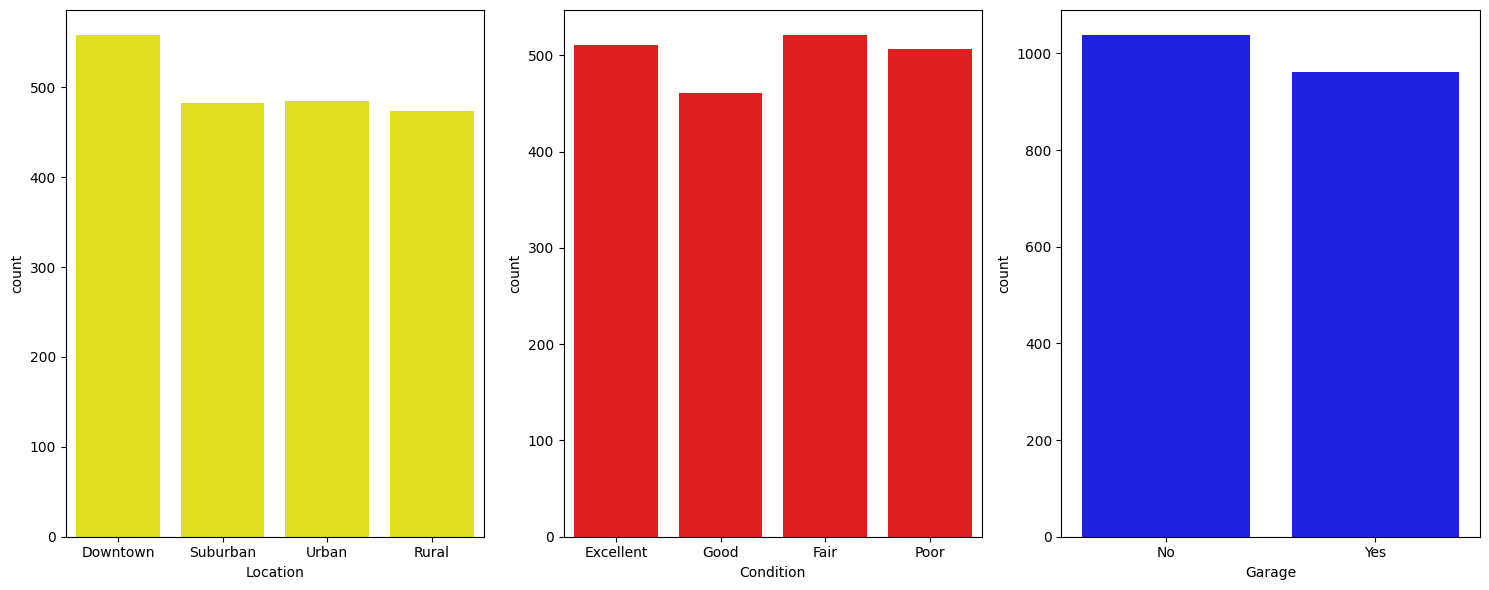

In [19]:
#count of location condition and garage
fig, axes = plt.subplots(1, 3, figsize=(15, 6))
sns.countplot(x='Location', data=data, ax=axes[0],color= 'yellow')
sns.countplot(x='Condition', data=data, ax=axes[1],color='red')
sns.countplot(x='Garage', data=data, ax=axes[2] , color='blue')
plt.tight_layout()
plt.show()

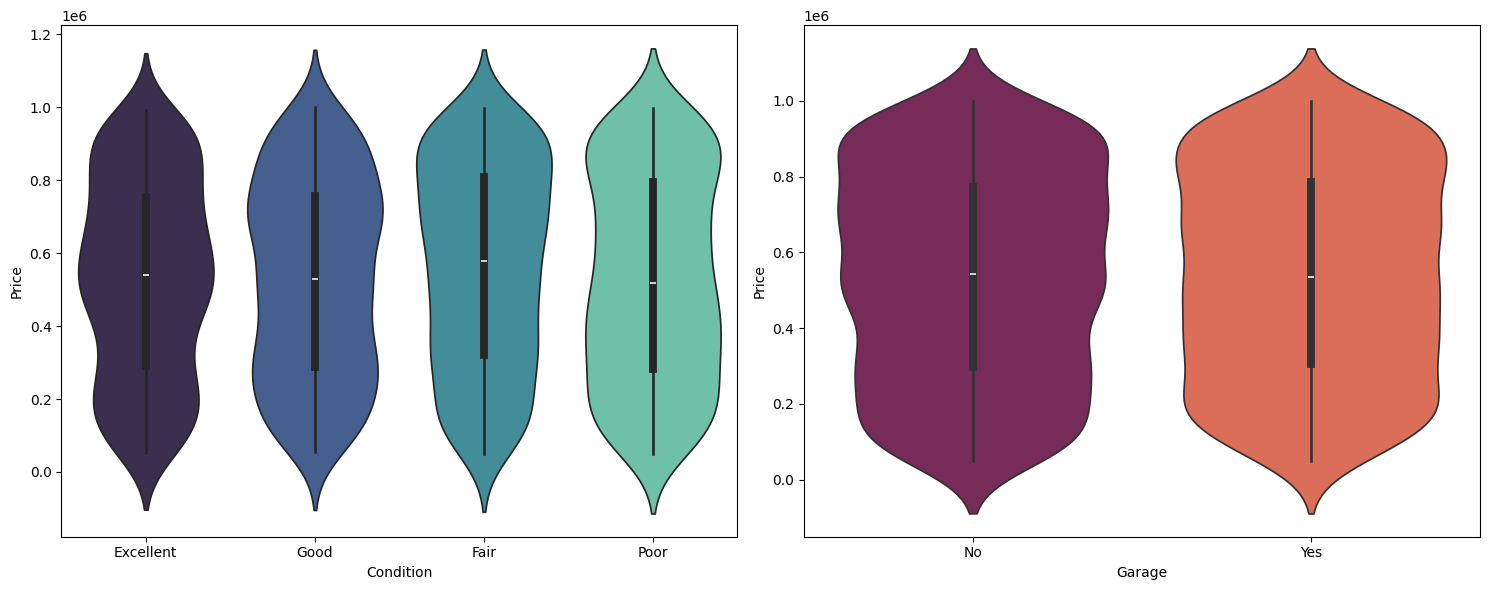

In [20]:
#price according to condition and garage
fig, axes = plt.subplots(1, 2, figsize=(15, 6))
sns.violinplot(x = 'Condition', y = 'Price', data = data,  hue='Condition' , ax = axes[0], palette = 'mako', legend=False)
sns.violinplot(x = 'Garage', y = 'Price', data = data, hue='Garage' , ax = axes[1], palette = 'rocket', legend=False)
plt.tight_layout()
plt.show()


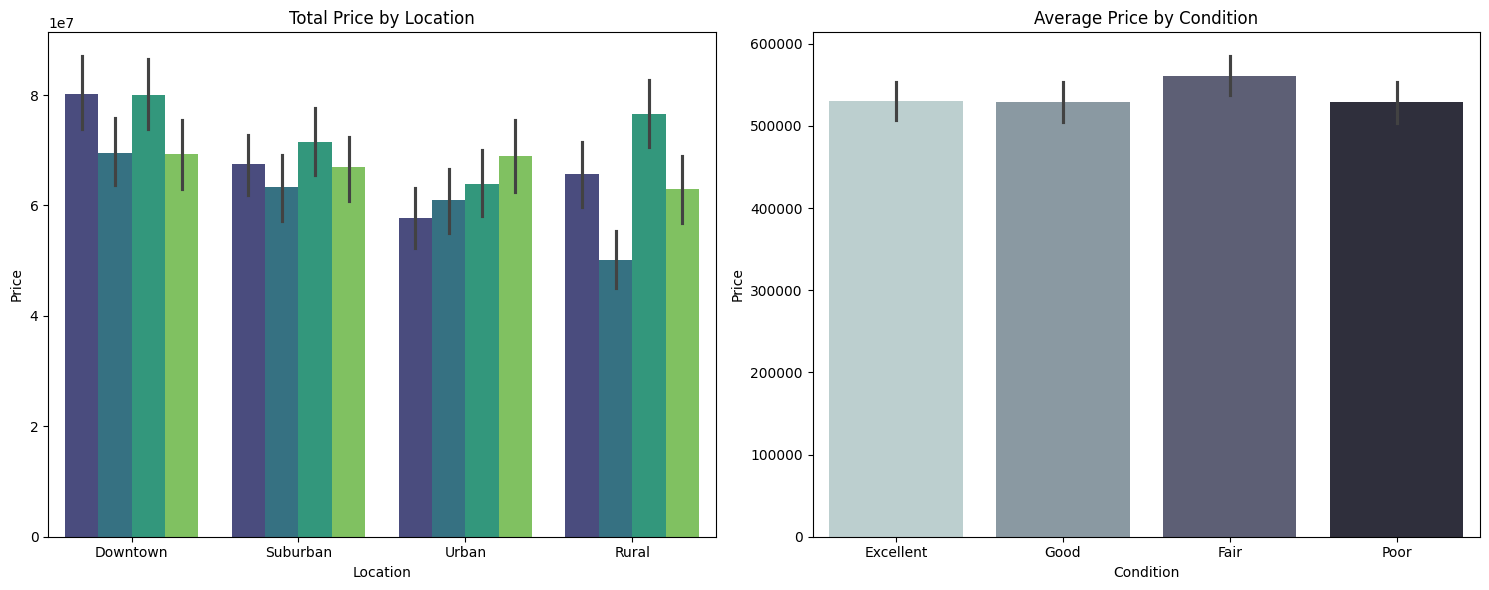

In [21]:
#price according to location ad condition
fig, axes = plt.subplots(1, 2, figsize = (15, 6))
sns.barplot(x = 'Location', y = 'Price', data = data,hue='Condition', ax = axes[0], estimator = sum, palette = 'viridis' , legend=False)
axes[0].set_title('Total Price by Location')

sns.barplot(x = 'Condition', y = 'Price', data = data, hue='Condition' , ax = axes[1], estimator = np.mean, palette = 'bone_r', legend=False)
axes[1].set_title('Average Price by Condition')
plt.tight_layout()
plt.show()

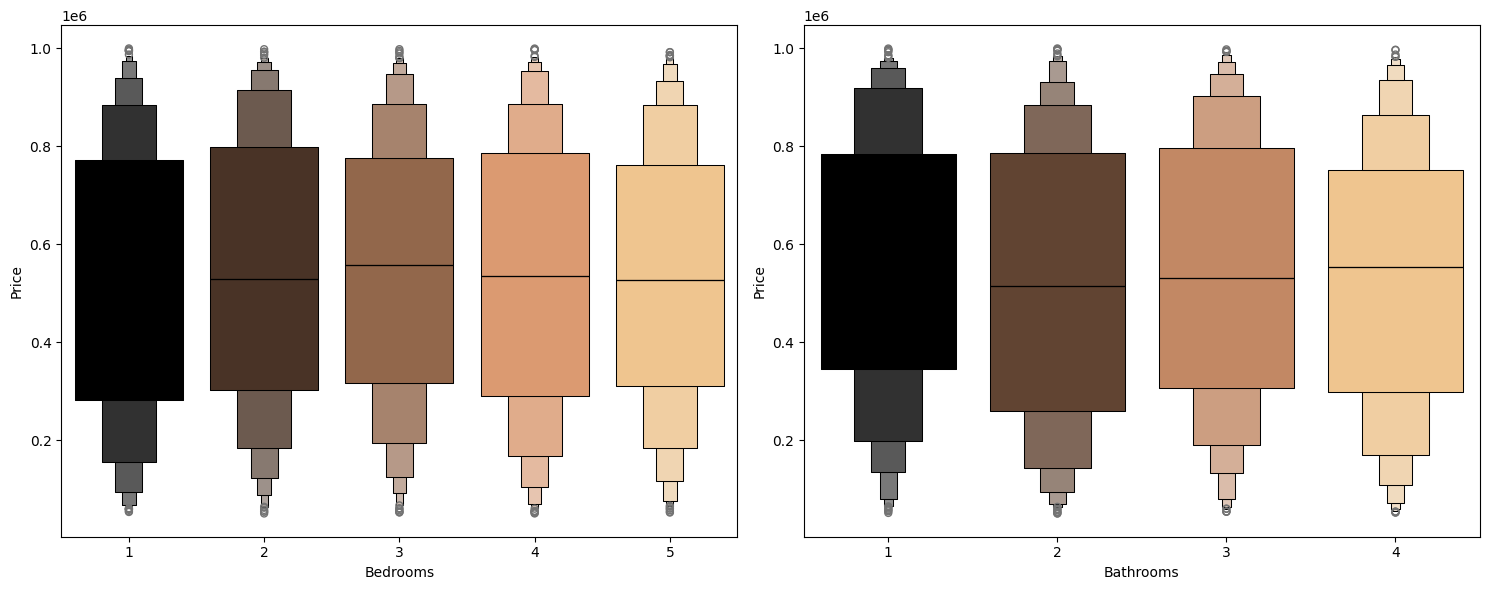

In [22]:
#price according to bedroom and bathrooms
fig, axes = plt.subplots(1, 2, figsize=(15, 6))
sns.boxenplot(x = 'Bedrooms', y = 'Price', data = data, ax = axes[0], palette = 'copper',hue='Bedrooms',legend=False)
sns.boxenplot(x = 'Bathrooms', y = 'Price', data = data, ax = axes[1], palette = 'copper',hue='Bathrooms',legend=False)
plt.tight_layout()
plt.show()

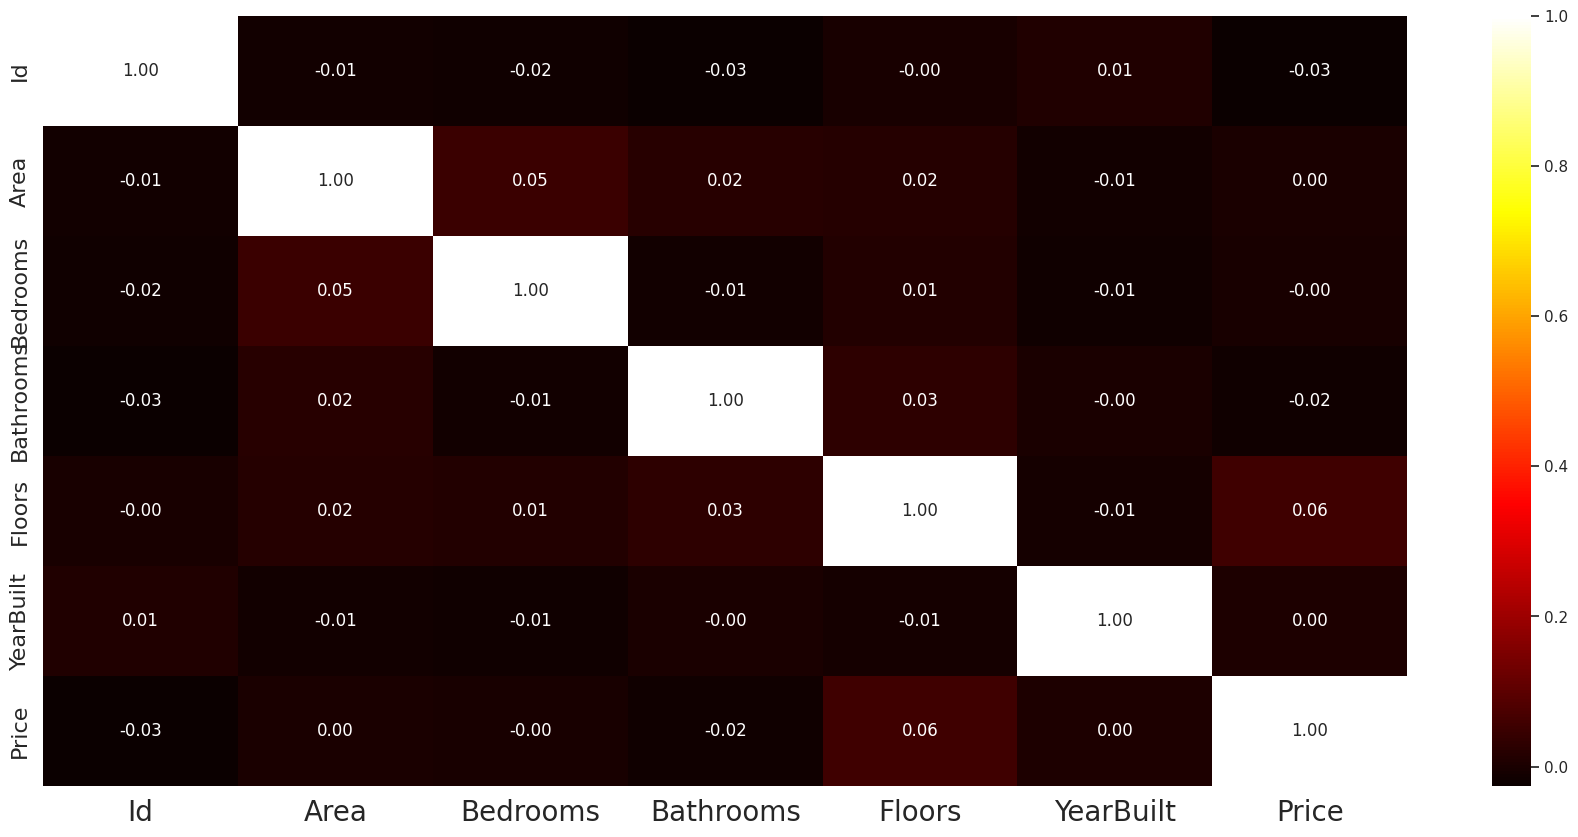

In [23]:
# Correlation Heatmap
sns.set(rc = {'figure.figsize' : (22,10)})
s = data.select_dtypes(include = 'number').corr()
sns.heatmap(s, cmap = 'hot', annot = True, fmt = '.2f')
plt.xticks(fontsize = 20)
plt.yticks(fontsize = 16)
plt.show()

In [31]:
# Using IQR for outlier detection
Q1 = data['Price'].quantile(0.25)
Q3 = data['Price'].quantile(0.75)
IQR = Q3 - Q1

# Filter out outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

data['outliers'] = (data['Price'] < lower_bound) | (data['Price'] > upper_bound)


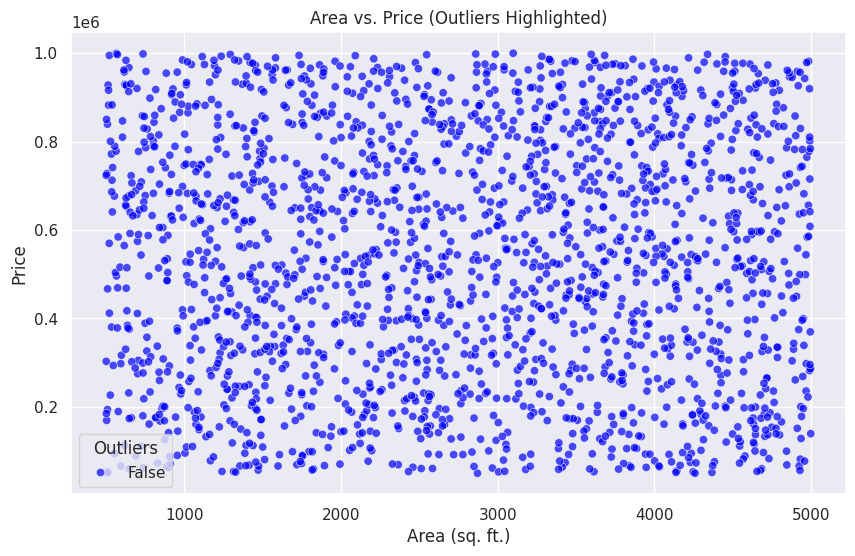

In [33]:
#Scatter Plot with Outliers Highlighted
plt.figure(figsize=(10, 6))
sns.scatterplot(x=data['Area'],y=data['Price'],hue=data['outliers'],palette={True: 'red', False: 'blue'},alpha=0.7)
plt.title("Area vs. Price (Outliers Highlighted)")
plt.xlabel("Area (sq. ft.)")
plt.ylabel("Price")
plt.legend(title="Outliers")
plt.show()


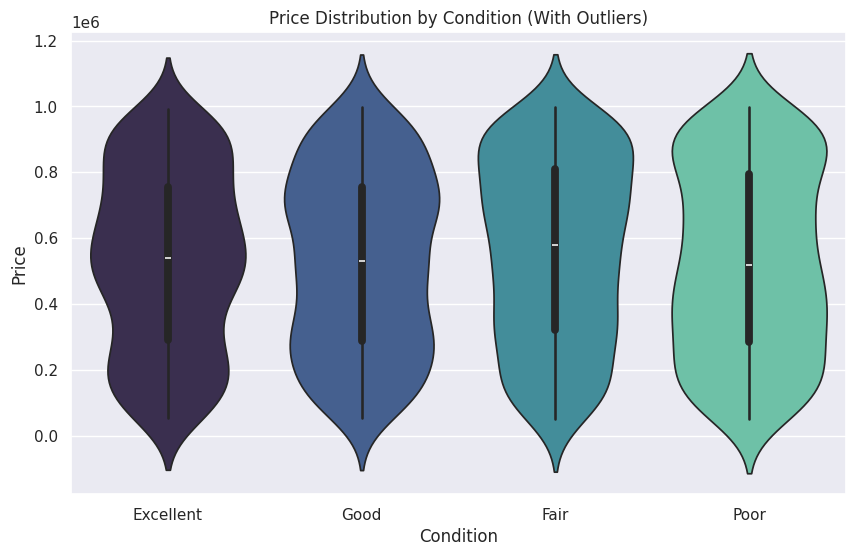

In [36]:
#Violin plots show the distribution and potential outliers together.
plt.figure(figsize=(10, 6))
sns.violinplot(x='Condition', y='Price', data=data, palette='mako' , hue='Condition', legend=False)
plt.title("Price Distribution by Condition (With Outliers)")
plt.xlabel("Condition")
plt.ylabel("Price")
plt.show()

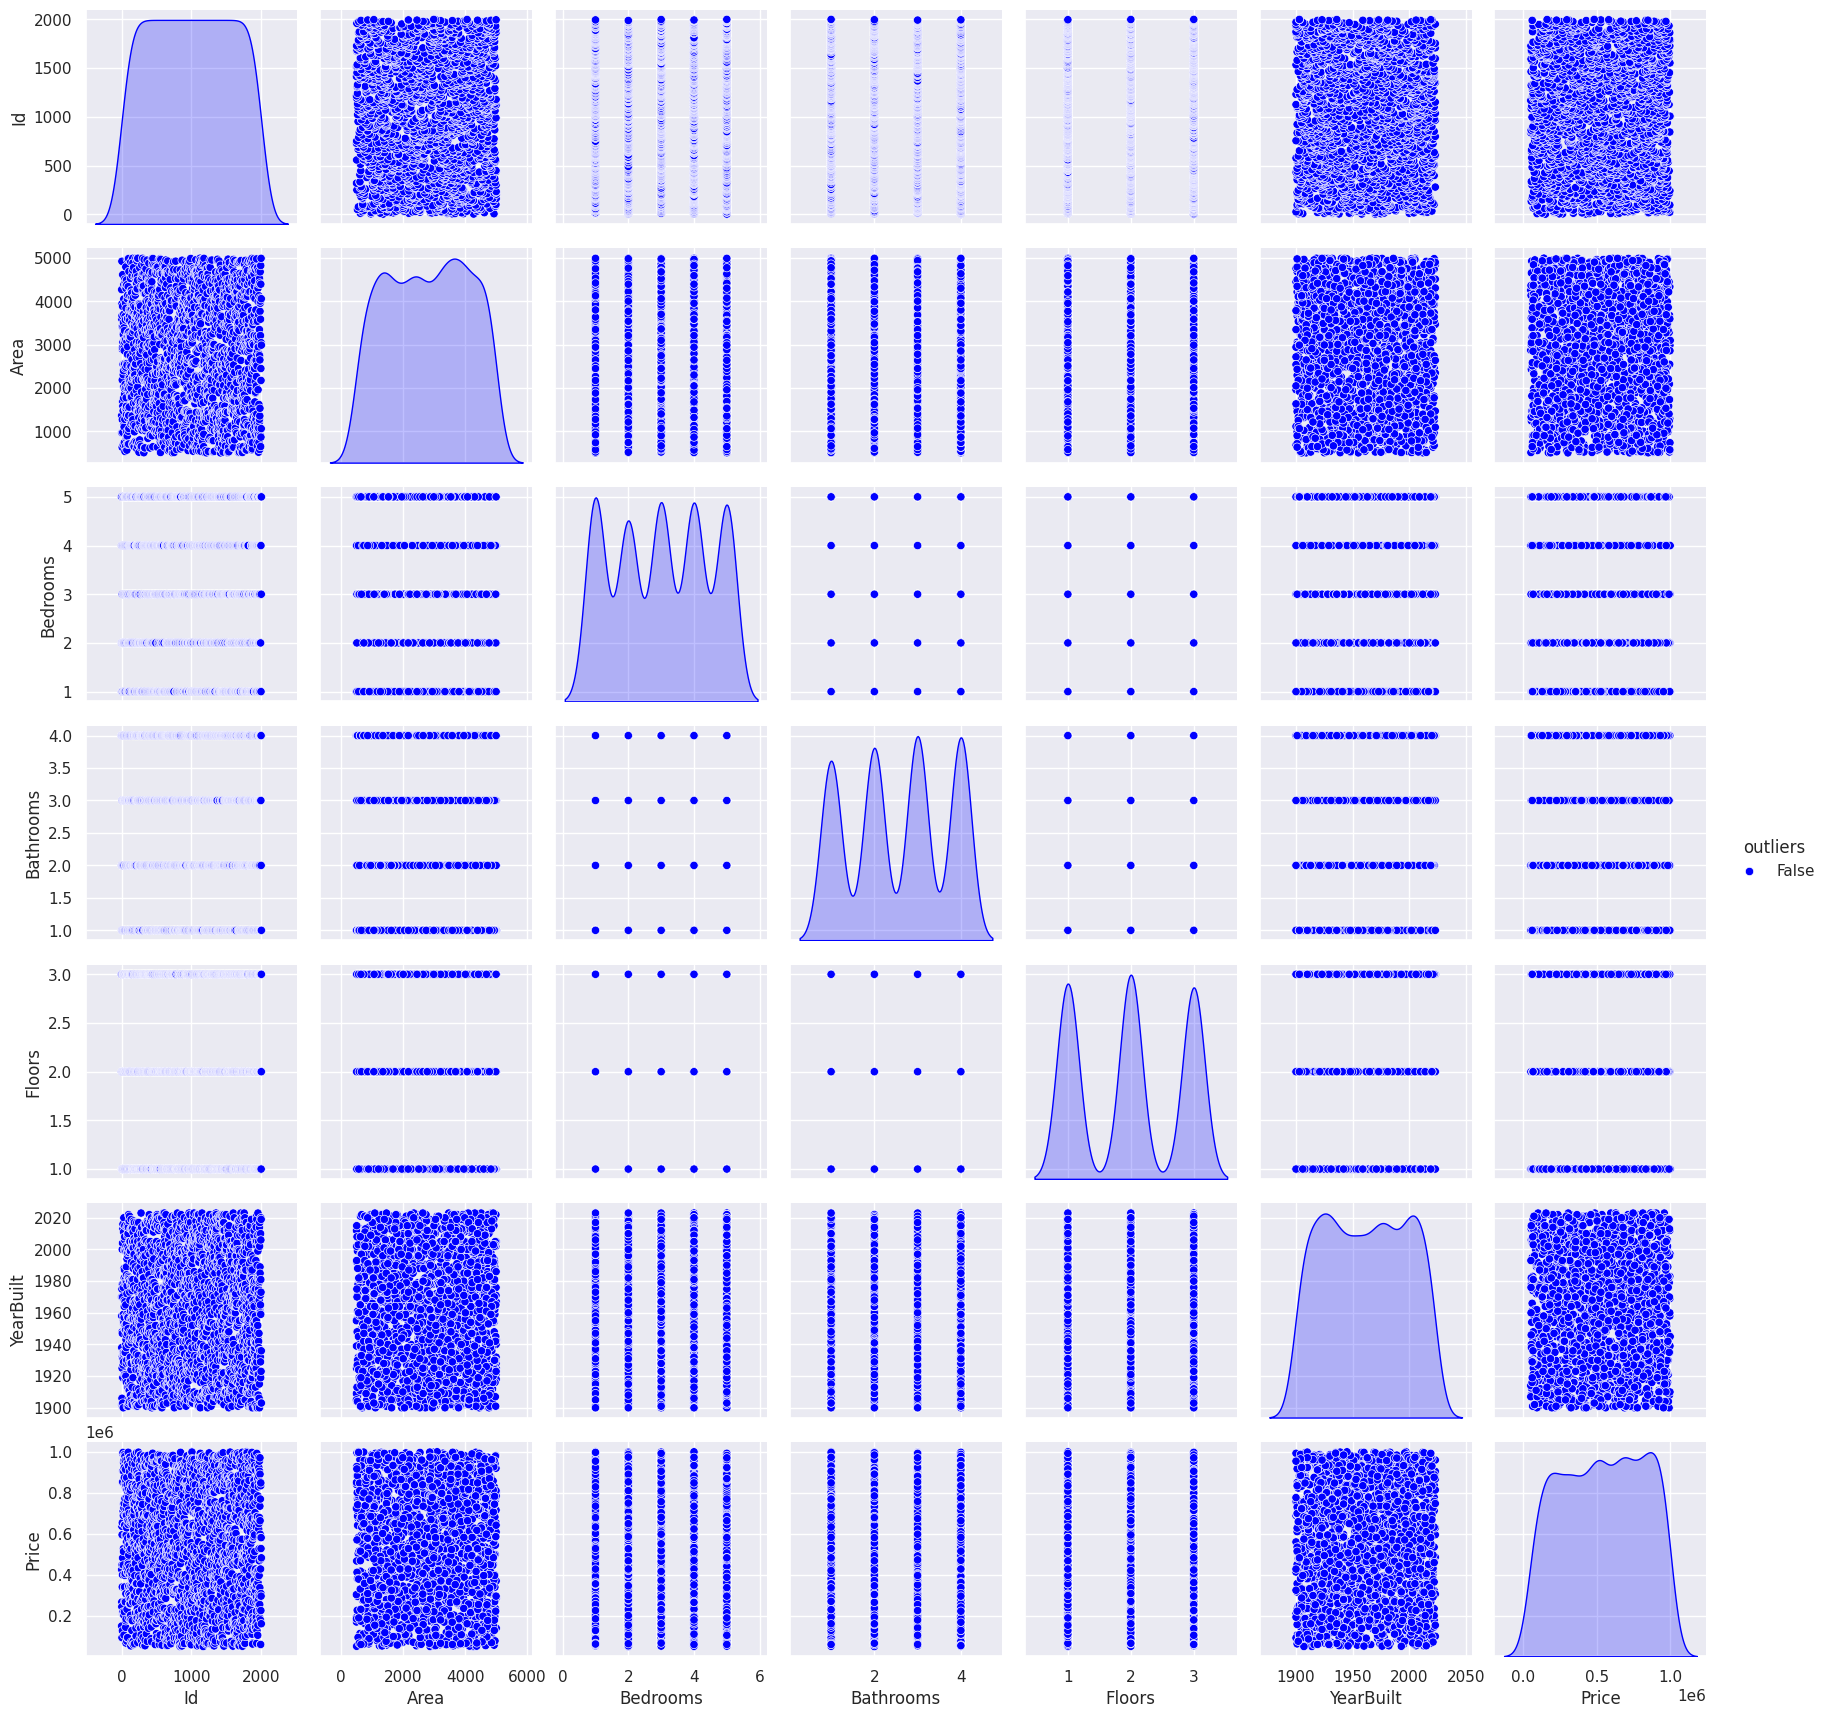

In [38]:
#pair plot for multivater outlier
sns.pairplot(data, hue='outliers', palette={True: 'red', False: 'blue'})
plt.show()
